In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
specs = {
    'r': [
        [ 
            np.array([599.7,611.0,582.6,623.7,575.5,612.1]),
            np.array([19.0,19.2,20.0,21.0,17.6,18.5]),
        ],
        [
            np.array([534.0,545.8,521.6,550.0,527.8,555.2]),
            np.array([16.4,16.7,16.7,17.4,16.0,16.7]),
        ],
    ],
    'g': [
        [
            np.array([608.8,605.5,574.6,595.3,583.1,593.3]),
            np.array([18.4,18.3,17.0,17.5,20.9,21.2]),
        ],
        [
            np.array([439.9,450.6,432.9,442.4,423.6,434.6]),
            np.array([13.8,14.1,13.5,13.7,14.3,14.6]),
        ],
    ],
    'b': [
        [
            np.array([488.8,510.1,489.9,519.0,487.9,511.2]),
            np.array([18.7,19.2,16.6,17.3,15.2,15.8]),
        ],
        [
            np.array([384.8,395.9,378.5,400.3,385.4,399.3]),
            np.array([13.3,13.6,12.6,13.1,12.4,12.8]),
        ],
    ]
}

In [64]:
'''This converts a given wavelength of light to an 
approximate RGB color value. The wavelength must be given
in nanometers in the range from 380 nm through 750 nm
(789 THz through 400 THz).

Original code by Dan Bruton
http://www.physics.sfasu.edu/astro/color/spectra.html

Python code by https://gist.github.com/error454/65d7f392e1acd4a782fc
Modified for Numpy by ChatGPT
'''

def wavelength_to_rgb(wavelengths, gamma=0.8):
    wavelengths = np.asarray(wavelengths, dtype=float)
    R = np.zeros_like(wavelengths)
    G = np.zeros_like(wavelengths)
    B = np.zeros_like(wavelengths)
    
    # Define conditions
    cond1 = (wavelengths >= 380) & (wavelengths <= 440)
    cond2 = (wavelengths > 440) & (wavelengths <= 490)
    cond3 = (wavelengths > 490) & (wavelengths <= 510)
    cond4 = (wavelengths > 510) & (wavelengths <= 580)
    cond5 = (wavelengths > 580) & (wavelengths <= 645)
    cond6 = (wavelengths > 645) & (wavelengths <= 750)
    
    # Apply calculations based on conditions
    attenuation = 0.3 + 0.7 * (wavelengths - 380) / (440 - 380)
    R[cond1] = ((-(wavelengths[cond1] - 440) / (440 - 380)) * attenuation[cond1]) ** gamma
    B[cond1] = (1.0 * attenuation[cond1]) ** gamma
    
    G[cond2] = ((wavelengths[cond2] - 440) / (490 - 440)) ** gamma
    B[cond2] = 1.0
    
    G[cond3] = 1.0
    B[cond3] = (-(wavelengths[cond3] - 510) / (510 - 490)) ** gamma
    
    R[cond4] = ((wavelengths[cond4] - 510) / (580 - 510)) ** gamma
    G[cond4] = 1.0
    
    R[cond5] = 1.0
    G[cond5] = (-(wavelengths[cond5] - 645) / (645 - 580)) ** gamma
    
    attenuation = 0.3 + 0.7 * (750 - wavelengths) / (750 - 645)
    R[cond6] = (1.0 * attenuation[cond6]) ** gamma

    
    # Stack into an array of RGB tuples
    return np.stack([R, G, B], axis=-1)

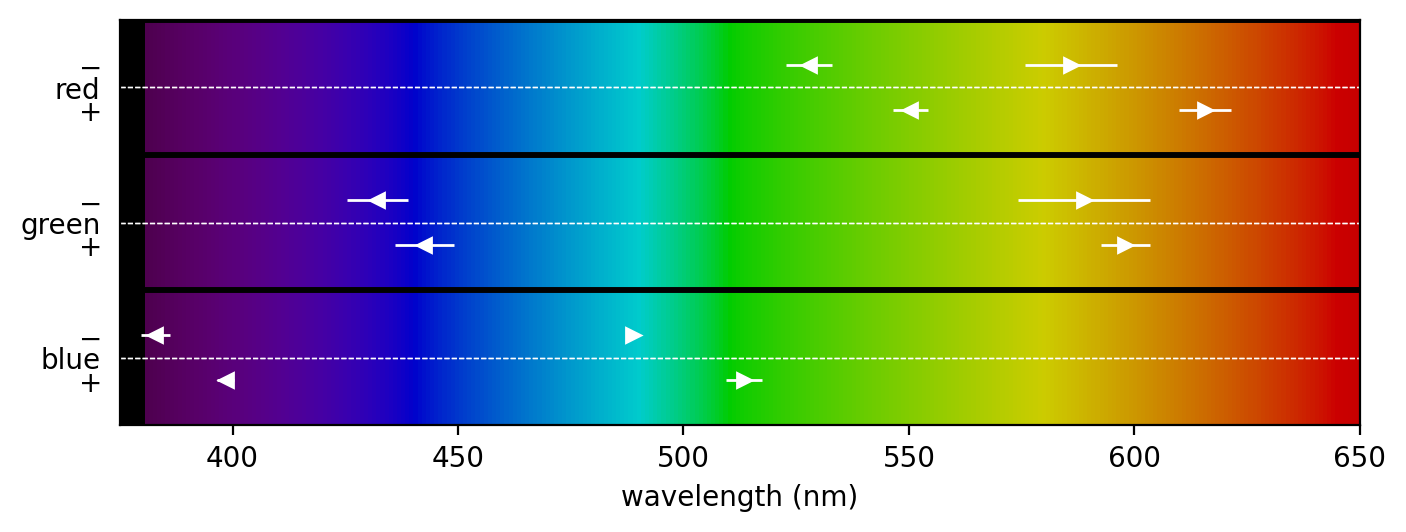

In [123]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)
space = np.linspace(650, 375, 300)
plt.xlim(np.min(space), np.max(space))
plt.xlabel('wavelength (nm)')
ax.imshow([wavelength_to_rgb(space)*0.8], extent=[np.max(space), np.min(space), 0, 9])

y = 0
for key in specs:
    led = specs[key]
    for (i, edge) in enumerate(led):
        spec = edge[0]
        dspec = edge[1]
        
        left = spec[0::2]
        right = spec[1::2]
        plt.errorbar(
            [np.mean(left), np.mean(right)], [y+1, y+2], xerr = [np.std(left), np.std(right)],
            ecolor="white", color='white',
            linewidth = 0, elinewidth = 1, markersize = 5, marker=['>','<'][i]
        )
        plt.axhline(y, color='black', lw=2)
        plt.axhline(y + 1.5, color='white', ls='--', lw=0.5)
    y+=3

ax.set_aspect(10)
ax.set_yticks([1,1.5,2,4,4.5,5,7,7.5,8], labels=['$-$', 'red', '$+$', '$-$', 'green', '$+$', '$-$', 'blue', '$+$'])
ax.set_ylim(9, 0)
ax.tick_params(which='both', axis='y', width=0)
